In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('50_startups.csv')
df.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
df.shape

(50, 5)

In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
df.ndim

2

In [6]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


## Data Cleaning

In [7]:
df['State'].value_counts()

California    17
New York      17
Florida       16
Name: State, dtype: int64

In [8]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [9]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

## EDA on Dataset

<AxesSubplot:xlabel='Profit'>

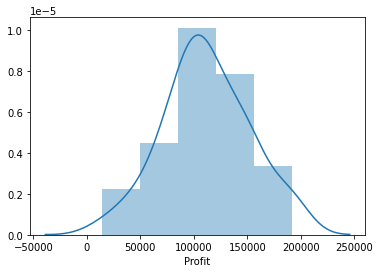

In [10]:
#Histgram on Profit
sns.distplot(df['Profit'],bins=5,kde=True)

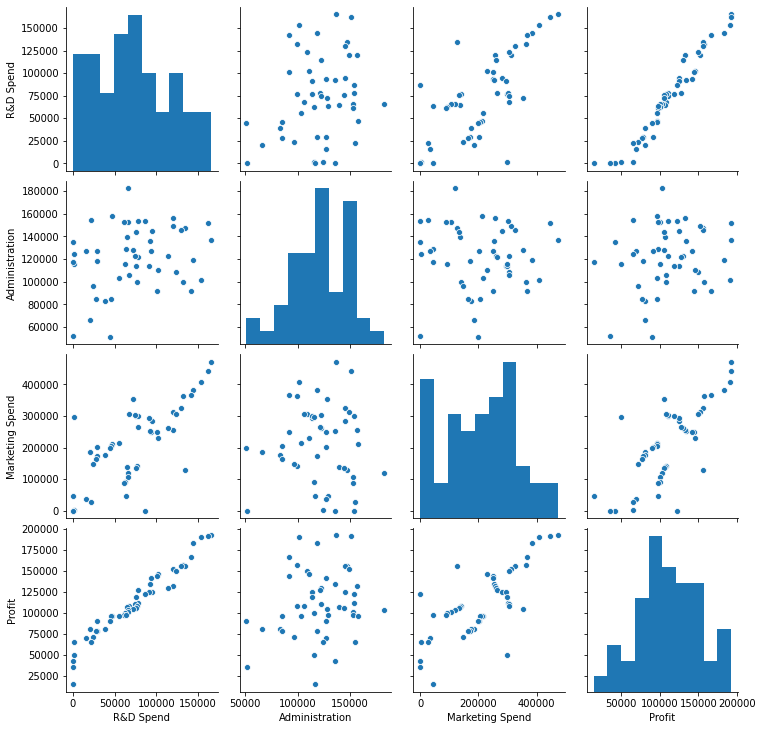

In [11]:
#Correlation  chart on different variables for comparision 
# Profit Vs R & Spend is very linear and almost same for Marketing spend
# Profit spend vs Administration distribution is very scattered 
sns.pairplot(df)

<AxesSubplot:xlabel='State', ylabel='Profit'>

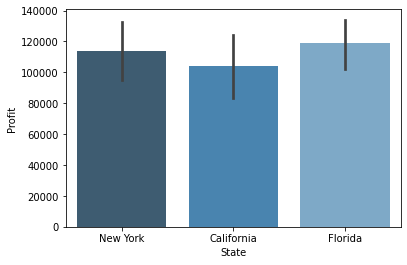

In [12]:
# profit split in State level - Looks Florida has the maximum Profit
sns.barplot(x='State',y='Profit',data=df, palette="Blues_d")
#sns.lineplot(x='State',y='Profit',data=dataset)

<AxesSubplot:>

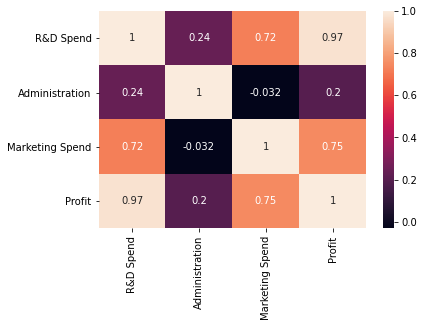

In [13]:
#gives positive & negative relation between categories
sns.heatmap(df.corr(), annot=True)

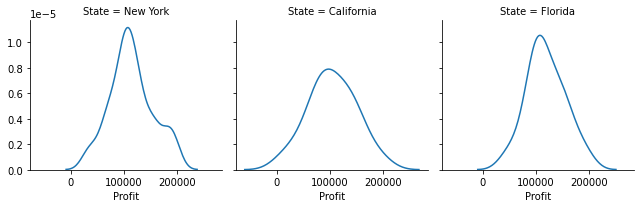

In [14]:
# spread of profit against state 
g=sns.FacetGrid(df, col='State')
g=g.map(sns.kdeplot,'Profit')

In [15]:
#Separating the Independent and the dependent variables
X = df.iloc[ : , :-1].values
y = df.iloc[ : , 4].values

In [16]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer

labelencoder_X = LabelEncoder()
X[:, 3] = labelencoder_X.fit_transform(X[:, 3])

# Country column
columnTransformer = ColumnTransformer([('State', OneHotEncoder(), [3])],     remainder='passthrough')
X=columnTransformer.fit_transform(X)

# Here index column 3 has categorical variable

In [17]:
# Avoiding the dummy variable trap
X = X[:, 1:]
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

In [18]:
X

array([[0.0, 1.0, 165349.2, 136897.8, 471784.1],
       [0.0, 0.0, 162597.7, 151377.59, 443898.53],
       [1.0, 0.0, 153441.51, 101145.55, 407934.54],
       [0.0, 1.0, 144372.41, 118671.85, 383199.62],
       [1.0, 0.0, 142107.34, 91391.77, 366168.42],
       [0.0, 1.0, 131876.9, 99814.71, 362861.36],
       [0.0, 0.0, 134615.46, 147198.87, 127716.82],
       [1.0, 0.0, 130298.13, 145530.06, 323876.68],
       [0.0, 1.0, 120542.52, 148718.95, 311613.29],
       [0.0, 0.0, 123334.88, 108679.17, 304981.62],
       [1.0, 0.0, 101913.08, 110594.11, 229160.95],
       [0.0, 0.0, 100671.96, 91790.61, 249744.55],
       [1.0, 0.0, 93863.75, 127320.38, 249839.44],
       [0.0, 0.0, 91992.39, 135495.07, 252664.93],
       [1.0, 0.0, 119943.24, 156547.42, 256512.92],
       [0.0, 1.0, 114523.61, 122616.84, 261776.23],
       [0.0, 0.0, 78013.11, 121597.55, 264346.06],
       [0.0, 1.0, 94657.16, 145077.58, 282574.31],
       [1.0, 0.0, 91749.16, 114175.79, 294919.57],
       [0.0, 1.0, 86419.7

## Data Partitioning

In [19]:
#Split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0 )

In [20]:
X_train,y_train

(array([[1.0, 0.0, 55493.95, 103057.49, 214634.81],
        [0.0, 1.0, 46014.02, 85047.44, 205517.64],
        [1.0, 0.0, 75328.87, 144135.98, 134050.07],
        [0.0, 0.0, 46426.07, 157693.92, 210797.67],
        [1.0, 0.0, 91749.16, 114175.79, 294919.57],
        [1.0, 0.0, 130298.13, 145530.06, 323876.68],
        [1.0, 0.0, 119943.24, 156547.42, 256512.92],
        [0.0, 1.0, 1000.23, 124153.04, 1903.93],
        [0.0, 1.0, 542.05, 51743.15, 0.0],
        [0.0, 1.0, 65605.48, 153032.06, 107138.38],
        [0.0, 1.0, 114523.61, 122616.84, 261776.23],
        [1.0, 0.0, 61994.48, 115641.28, 91131.24],
        [0.0, 0.0, 63408.86, 129219.61, 46085.25],
        [0.0, 0.0, 78013.11, 121597.55, 264346.06],
        [0.0, 0.0, 23640.93, 96189.63, 148001.11],
        [0.0, 0.0, 76253.86, 113867.3, 298664.47],
        [0.0, 1.0, 15505.73, 127382.3, 35534.17],
        [0.0, 1.0, 120542.52, 148718.95, 311613.29],
        [0.0, 0.0, 91992.39, 135495.07, 252664.93],
        [0.0, 0.0, 64664.71

In [21]:
# Make a new dataframe for comparing all the models
columns = ['Model Name', 'R2 Value']
df_model_comp = pd.DataFrame(columns=columns)
def model_comp(model_name, r2_value):
    df_model_comp.loc[len(df_model_comp.index)] = [model_name,r2_value]
    return df_model_comp

## Data Preprocesing using MinMaxScaler

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Machine Learning Model Building

### Cross Validation

In [23]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, X_train=X_train, y_train=y_train):
    cv = KFold(n_splits = 3, shuffle=True, random_state = 0)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, X_train, y_train, cv=5, scoring = r2)
    score = r2_val_score.mean()
    return score

### Model - Multiple Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
model_name = 'Multiple Linear Regression'
r2_value = test_model(LR)
r2_value

0.8613328292604052

In [25]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86


In [26]:
# Cross validation
cross_validation = cross_val_score(estimator = LR, X = X_train, y = y_train, cv = 5)
print("Cross validation accuracy of LR model = ", cross_validation)
print("\nCross validation mean accuracy of LR model = ", cross_validation.mean())

Cross validation accuracy of LR model =  [0.64120447 0.88536669 0.90980771 0.8961349  0.97415038]

Cross validation mean accuracy of LR model =  0.8613328292604052


### Model - Polynomial Regression

In [57]:
from sklearn.preprocessing import PolynomialFeatures 

poly_reg = PolynomialFeatures(degree = 2) 
X_poly = poly_reg.fit_transform(X_train)

poly_reg.fit(X_poly, y_train) 
lin_reg_2 = LinearRegression()
model_name = 'Polynomial Regression (Degree = 2)'

In [28]:
lin_reg_2.fit(X_poly, y_train)
r2_value = test_model(lin_reg_2,X_poly)
r2_value

0.5185572428396517

In [29]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52


### Model - Ridge Regression

In [31]:
from sklearn.linear_model import Ridge

rdg = Ridge()
model_name = 'Ridge Regression'
r2_value = test_model(rdg)
r2_value

0.8545220928872304

In [32]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85


### Model - Lasso Regression

In [33]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=1e-4)
model_name = 'Lasso Regression'
r2_value = test_model(lasso)
r2_value

0.861332829578369

In [34]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85
3,Lasso Regression,0.86


### Model - Support Vector Machine Regressor

In [84]:
from sklearn.svm import SVR

svr_reg = SVR(kernel='rbf')
model_name = 'SVM Regressor'
r2_value = test_model(svr_reg)
r2_value

-0.11282886046514173

In [86]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85
3,Lasso Regression,0.86
4,Decision Tree Regressor,0.82
5,Random Forest Regressor,0.88
6,Boosting Regressor,0.89
7,XGBoost (gblinear) Regressor,0.89
8,XGBoost (gblinear) Regressor,0.89
9,Hypertuned Ridge Regressor,0.86


### Model - Decision Tree Regressor

In [37]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=0)
model_name = 'Decision Tree Regressor'
r2_value = test_model(dt_reg)
r2_value

0.816501370326371

In [38]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85
3,Lasso Regression,0.86
4,Decision Tree Regressor,0.82


### Model - Random Forest Regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
model_name = 'Random Forest Regressor'
r2_value = test_model(rf_reg)
r2_value

0.8757841109159734

In [40]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85
3,Lasso Regression,0.86
4,Decision Tree Regressor,0.82
5,Random Forest Regressor,0.88


### Model - Bagging & boosting

In [41]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
model_name = 'Bagging Regressor'

r2_value = test_model(br_reg)
r2_value

0.8769964585788965

In [42]:
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)
model_name = 'Boosting Regressor'

In [43]:
r2_value = test_model(gbr_reg)
r2_value

0.88643509090349

In [44]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85
3,Lasso Regression,0.86
4,Decision Tree Regressor,0.82
5,Random Forest Regressor,0.88
6,Boosting Regressor,0.89


### Model - XGBoost Regressor

In [45]:
import xgboost
xgb_reg = xgboost.XGBRegressor(bbooster='gbtree', random_state=0)
model_name = 'XGBoost (gbtree) Regressor'
r2_value = test_model(xgb_reg)
r2_value

[15:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bbooster } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bbooster } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bbooster } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

0.8877171583781097

In [46]:
import xgboost
xgb_reg = xgboost.XGBRegressor(bbooster='gblinear', random_state=0)
model_name = 'XGBoost (gblinear) Regressor'
r2_value = test_model(xgb_reg)
r2_value

[15:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bbooster } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bbooster } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { bbooster } might not be used.

  This may not be accurate due to some parameters are only used in language bindi

0.8877171583781097

In [47]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85
3,Lasso Regression,0.86
4,Decision Tree Regressor,0.82
5,Random Forest Regressor,0.88
6,Boosting Regressor,0.89
7,XGBoost (gblinear) Regressor,0.89


### SVM Model Building

In [48]:
svr_reg.fit(X_train,y_train)
# y_pred = np.exp(svr_reg.predict(X_test)).round(2)

SVR()

In [49]:
r2_value = test_model(svr_reg)
r2_value

-0.11282886046514173

In [50]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'kernel': ['linear','rbf','sigmoid'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000],
         'epsilon': [1, 0.2, 0.1, 0.01, 0.001, 0.0001]}
rand_search = RandomizedSearchCV(svr_reg, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(X_train, y_train)
rand_search.best_score_

-0.9451891276915062

In [51]:
svr_reg= SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma=0.0001,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
r2_value = test_model(svr_reg)
r2_value

-0.11291692356763239

In [52]:
xgb2_reg=xgboost.XGBRegressor(n_estimators= 899,
 mon_child_weight= 2,
 max_depth= 4,
 learning_rate= 0.05,
 booster= 'gbtree')

r2_value = test_model(xgb2_reg)
r2_value

[15:05:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are onl

0.8929247825143115

In [53]:
xgb2_reg.fit(X_train,y_train)
y_pred_xgb_rs=xgb2_reg.predict(X_test)

[15:05:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [54]:
r2_value = test_model(xgb2_reg)
r2_value

[15:05:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:05:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are onl

0.8929247825143115

In [55]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85
3,Lasso Regression,0.86
4,Decision Tree Regressor,0.82
5,Random Forest Regressor,0.88
6,Boosting Regressor,0.89
7,XGBoost (gblinear) Regressor,0.89
8,XGBoost (gblinear) Regressor,0.89


### Hyperparameter Tuning for Ridge Regression

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

ridge = Ridge()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-6,1e-4,1e-2,1,5,10,20,30,40,45,50,55,60,70,80,100]}
reg_r=GridSearchCV(ridge,parameters,cv = 5)
reg_r.fit(X_train,y_train)

model_name = 'Hypertuned Ridge Regressor'

In [59]:
print(reg_r.best_estimator_)
print(reg_r.best_score_)



Ridge(alpha=0.01)
0.8637976655455818


In [60]:
r2_value = reg_r.best_score_
r2_value

0.8637976655455818

In [61]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85
3,Lasso Regression,0.86
4,Decision Tree Regressor,0.82
5,Random Forest Regressor,0.88
6,Boosting Regressor,0.89
7,XGBoost (gblinear) Regressor,0.89
8,XGBoost (gblinear) Regressor,0.89
9,Hypertuned Ridge Regressor,0.86


### Hyperparameter Tuning for Lasso Regression

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

ridge = Lasso()
parameters = {'alpha':[1e-15,1e-10,1e-8,1e-6,1e-4,1e-2,1,5,10,20,30,40,45,50,55,60,70,80,100]}
reg_l=GridSearchCV(ridge,parameters,cv = 5)
reg_l.fit(X_train,y_train)
model_name = 'Hypertuned Lasso Regressor'

C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1089423346.4895787, tolerance: 6011195.075949145
  model = cd_fast.enet_coordinate_descent(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1330510136.242371, tolerance: 5722184.60146116
  model = cd_fast.enet_coordinate_descent(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 928611272.2212231, tolerance: 4896242.86485592
  model = cd_fast.enet_coordinate_descent(
C:\Users\kumar\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning

In [64]:
print(reg_l.best_estimator_)
print(reg_l.best_score_)

Lasso(alpha=100)
0.8722262575603971


In [65]:
r2_value = reg_l.best_score_
r2_value

0.8722262575603971

In [66]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85
3,Lasso Regression,0.86
4,Decision Tree Regressor,0.82
5,Random Forest Regressor,0.88
6,Boosting Regressor,0.89
7,XGBoost (gblinear) Regressor,0.89
8,XGBoost (gblinear) Regressor,0.89
9,Hypertuned Ridge Regressor,0.86


## Hyperparameter Tuning for SVM Regressor

In [67]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
params = {'kernel': ['linear','rbf','sigmoid'],
         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
         'C': [0.1, 1, 10, 100, 1000],
         'epsilon': [1, 0.2, 0.1, 0.01, 0.001, 0.0001]}
rand_search = RandomizedSearchCV(svr_reg, param_distributions=params, n_jobs=-1, cv=11)
rand_search.fit(X_train, y_train)
rand_search.best_score_
model_name = 'Hypertuned SVM Regressor'

In [68]:
rand_search.best_estimator_


SVR(C=10, epsilon=0.001, gamma=1, kernel='linear')

In [70]:
# test_model()

In [71]:
svr_reg= SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.001, gamma=0.001,kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
test_model(svr_reg)

-0.09650133906952393

In [72]:
svr_reg.fit(X_train,y_train)
y_pred = np.exp(svr_reg.predict(X_test)).round(2)

<ipython-input-72-179e721a1b38>:2: RuntimeWarning: overflow encountered in exp
  y_pred = np.exp(svr_reg.predict(X_test)).round(2)


In [73]:
y_pred

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf])

In [74]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85
3,Lasso Regression,0.86
4,Decision Tree Regressor,0.82
5,Random Forest Regressor,0.88
6,Boosting Regressor,0.89
7,XGBoost (gblinear) Regressor,0.89
8,XGBoost (gblinear) Regressor,0.89
9,Hypertuned Ridge Regressor,0.86


## Hyperparameter Tuning for XGBoost Regressor

In [75]:
xgb2_reg = xgboost.XGBRegressor() 
params_xgb = { 'max_depth': range(2, 20, 2), 'n_estimators': range(99, 2001, 80), 'learning_rate': [0.2, 0.1, 0.01, 0.05], 'booster': ['gbtree','gblinear'], 'mon_child_weight': range(1, 8, 1) }
r2 = make_scorer(r2_score)
rand_search_xgb = RandomizedSearchCV(estimator = xgb2_reg, param_distributions=params_xgb, n_iter=100, n_jobs=-1, cv=11, verbose=11, random_state=51, return_train_score =True, scoring=r2) 
rand_search_xgb.fit(X_train,y_train)

model_name = 'Hypertuned XGBoost Regressor'

Fitting 11 folds for each of 100 candidates, totalling 1100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   10.2s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   11.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   11.9s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   13.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   14.8s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   15.0s
[Parallel(n_jobs=-1)]: Done  11 tasks      | elapsed:   15.3s
[Parallel(n_jobs=-1)]: Done  12 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   17.5s
[Parallel(n_jobs=-1)]: Done  15 tasks      | elapsed:   

[Parallel(n_jobs=-1)]: Done 132 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 133 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 134 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 135 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 136 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 137 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 139 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 140 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 142 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 143 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 145 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 147 tasks      | elapsed:  1.4min
[Paralle

[Parallel(n_jobs=-1)]: Done 266 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 267 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 269 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 270 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 271 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 273 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 274 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 275 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 276 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 277 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 279 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 281 tasks      | elapsed:  2.7min
[Paralle

[Parallel(n_jobs=-1)]: Done 401 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 402 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 403 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 404 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 405 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 406 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 407 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 408 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 409 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 411 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 412 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 414 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 415 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 416 tasks      | elapsed:  3.7min
[Paralle

[Parallel(n_jobs=-1)]: Done 534 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 535 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 537 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 538 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 539 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 540 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 541 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 542 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 543 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 544 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 545 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 546 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 547 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 548 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 549 tasks      | elapsed:  5.0min
[Paralle

[Parallel(n_jobs=-1)]: Done 668 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 669 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 671 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 673 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 674 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 675 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 676 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 677 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 678 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 679 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 680 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 681 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 682 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 683 tasks      | elapsed:  6.2min
[Paralle

[Parallel(n_jobs=-1)]: Done 801 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 802 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 803 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 804 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 805 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 806 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 807 tasks      | elapsed:  7.0min
[Parallel(n_jobs=-1)]: Done 808 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 809 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 810 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 811 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 812 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 813 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 814 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 815 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 816 tasks      | elapsed:  7.1min
[Paralle

[Parallel(n_jobs=-1)]: Done 935 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 936 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 937 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 938 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 939 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 940 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 941 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 942 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 943 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 944 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 945 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 946 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 947 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 948 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 949 tasks      | elapsed:  7.9min
[Parallel(n_jobs=-1)]: Done 950 tasks      | elapsed:  7.9min
[Paralle

[Parallel(n_jobs=-1)]: Done 1067 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1068 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1069 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1070 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1071 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1072 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1073 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1074 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1075 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1076 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1077 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1078 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1079 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1080 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1081 tasks      | elapsed:  8.6min
[Parallel(n_jobs=-1)]: Done 1082 tasks      | elapsed: 

[15:15:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { max_depth, mon_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:  9.0min finished


In [76]:
rand_search_xgb.best_score_

0.7258716530957605

In [77]:
r2_value = rand_search_xgb.best_score_
r2_value

0.7258716530957605

In [78]:
rand_search_xgb.best_estimator_

XGBRegressor(base_score=0.5, booster='gblinear', colsample_bylevel=None,
             colsample_bynode=None, colsample_bytree=None, gamma=None,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.2, max_delta_step=None, max_depth=10,
             min_child_weight=None, missing=nan, mon_child_weight=4,
             monotone_constraints=None, n_estimators=99, n_jobs=8,
             num_parallel_tree=None, random_state=0, reg_alpha=0, reg_lambda=0,
             scale_pos_weight=1, subsample=None, tree_method=None,
             validate_parameters=1, verbosity=None)

In [79]:
rand_search_xgb.best_params_

{'n_estimators': 99,
 'mon_child_weight': 4,
 'max_depth': 10,
 'learning_rate': 0.2,
 'booster': 'gblinear'}

In [80]:
xgb2_reg=xgboost.XGBRegressor(n_estimators= 659,
 mon_child_weight= 3,
 max_depth= 2,
 learning_rate= 0.01,
 booster= 'gbtree')

test_model(xgb2_reg)

[15:15:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:15:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:15:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are onl

0.8993401236548524

In [81]:
xgb2_reg.fit(X_train,y_train)
y_pred_xgb_rs=xgb2_reg.predict(X_test)

[15:15:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { mon_child_weight } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [82]:
model_comp(model_name, round(r2_value,2))

,Model Name,R2 Value
0,Multiple Linear Regression,0.86
1,Polynomial Regression,0.52
2,Ridge Regression,0.85
3,Lasso Regression,0.86
4,Decision Tree Regressor,0.82
5,Random Forest Regressor,0.88
6,Boosting Regressor,0.89
7,XGBoost (gblinear) Regressor,0.89
8,XGBoost (gblinear) Regressor,0.89
9,Hypertuned Ridge Regressor,0.86
